## Simple toy model

I assume that the auditory filters are Gaussian (masking pattern and excitation pattern then follow a 2nd degre polynome)

In [2]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.ndimage  import gaussian_filter1d

### Latencies

In [3]:
m=500

log_f=np.linspace(np.log(0.5), np.log(8), num=m)
f=1000*np.exp(log_f)
t=1/100*0.5*(f/1000.)**(-0.7)#approx

def f_from_t(t):
    return (100/0.5*t)**(-1/0.7)*1000

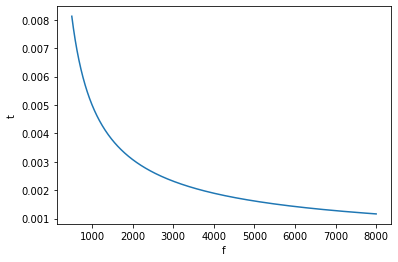

In [4]:
pl.figure()
pl.plot(f,t)
pl.xlabel('f')
pl.ylabel('t')
pl.show()

### CAP without masking

In [5]:
f_c = 2e3
sig_o = 1/4*f_c
E=30-20*1/4*(f-f_c)**2/(sig_o**2)
E=np.maximum(E, 0)

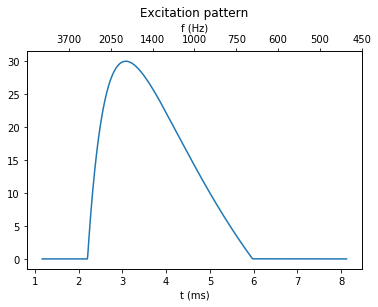

In [6]:
pl.figure()
pl.plot(t*1000,E)
pl.xlabel('t (ms)')
pl.title('Excitation pattern')



ax2 = pl.gca().twiny()
new_tick_locations=np.linspace(1,8, num=8)
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(np.round(f_from_t((new_tick_locations+1)*1e-3)/50).astype(np.int32)*50)
ax2.set_xlabel('f (Hz)')

pl.show()

In [7]:
Eprime = (np.roll(E, 1) - E)/(np.roll(t,1)-t)
Eprime[0]=0

Eprime2 = (np.roll(Eprime, 1) - Eprime)/(np.roll(t,1)-t)
Eprime2[0]=0

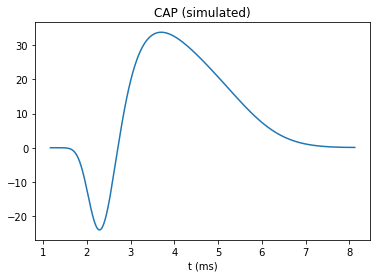

In [8]:
CAP=E-0.001*Eprime
CAP=gaussian_filter1d(CAP, sigma=30) #filtering in log domain (!!)
pl.figure()
pl.plot(t*1000,CAP)
pl.xlabel('t (ms)')
pl.title('CAP (simulated)')
pl.show()

### Example of masked CAP (tone on tone burst)

I assume that the degree of masking is linear w.r.t response of the masker in dB (on a interval). 

In [94]:
f_c_m = 1.5e3
Q_0=2.5
sig_o_m = 1/Q_0*1/4*f_c
M=0.8*(1-1/20*20*1/4*(f-f_c_m)**2/(sig_o_m**2))
M=np.maximum(M, 0)

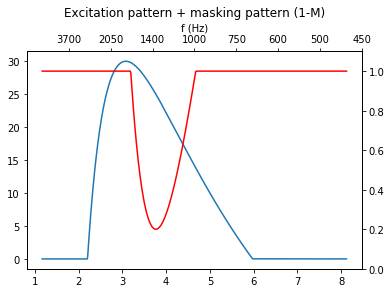

In [95]:
pl.figure()
pl.plot(t*1000,E)
pl.twinx()
pl.plot(t*1000,1-M, color='r')
pl.ylim([0,1.1])
pl.xlabel('t (ms)')
pl.title('Excitation pattern + masking pattern (1-M)')



ax2 = pl.gca().twiny()
new_tick_locations=np.linspace(1,8, num=8)
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(np.round(f_from_t((new_tick_locations+1)*1e-3)/50).astype(np.int32)*50)
ax2.set_xlabel('f (Hz)')

pl.show()

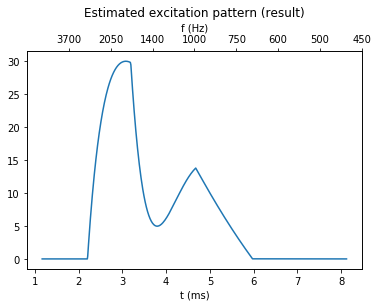

In [96]:
Em=Emasked=E*(1-M)

pl.figure()
pl.plot(t*1000, Emasked)
pl.xlabel('t (ms)')
pl.title('Estimated excitation pattern (result)')



ax2 = pl.gca().twiny()
new_tick_locations=np.linspace(1,8, num=8)
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(np.round(f_from_t((new_tick_locations+1)*1e-3)/50).astype(np.int32)*50)
ax2.set_xlabel('f (Hz)')

pl.show()

In [97]:
Emprime = (np.roll(Emasked, 1) - Emasked)/(np.roll(t,1)-t)
Emprime[0]=0

Emprime2 = (np.roll(Emprime, 1) - Emprime)/(np.roll(t,1)-t)
Emprime2[0]=0

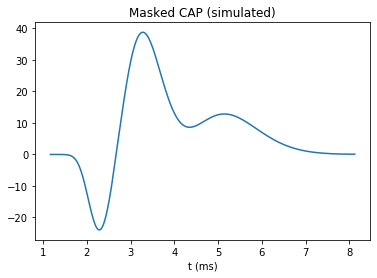

In [98]:
CAPm=Em-0.001*Emprime
CAPm=gaussian_filter1d(CAPm, sigma=30) #filtering in log domain (!!)
pl.figure()
pl.plot(t*1000,CAPm)
pl.xlabel('t (ms)')
pl.title('Masked CAP (simulated)')
pl.show()